In [40]:
import os
import statistics
import pandas


In [1]:
def readtime(path):
    with open(path, 'r') as stream:
        for line in stream:
            if line.startswith("real"):
                time = line.strip().split(' ', 1)[1]
                break
    return float(time)

In [74]:
size = 500
time = {"clean": [], "ccache": [], "gain": [], "success": [], "reproducible": [True for _ in range(size)]}
for i in range(1, size+1):
    tmp = []
    for j in range(1, 3+1):
        tmp.append(readtime(f"results/toybox/commits/simple-run{j}/{i:03}.time"))
    time["clean"].append(statistics.fmean(tmp))

for i in range(1, size+1):
    tmp = []
    for j in range(1, 3+1):
        tmp.append(readtime(f"results/toybox/commits/ccache-run{j}/{i:03}.time"))
    time["ccache"].append(statistics.fmean(tmp))

for i in range(len(time["clean"])):
    time["gain"].append((time["clean"][i] - time["ccache"][i])/time["clean"][i]*100)
    time["success"].append(os.path.isfile(f"results/toybox/commits/ccache-run1/{i+1:03}.bin"))

In [71]:
dftb = pandas.DataFrame(time)
dftb

,clean,ccache,gain,success,reproducible
0,6.010000,7.406667,-23.239046,True,True
1,6.063333,6.140000,-1.264431,True,True
2,6.060000,6.116667,-0.935094,True,True
3,6.066667,7.193333,-18.571429,True,True
4,6.063333,7.240000,-19.406267,True,True
...,...,...,...,...,...
495,3.366667,3.520000,-4.554455,True,True
496,3.400000,3.586667,-5.490196,True,True
497,3.426667,3.573333,-4.280156,True,True
498,3.400000,3.566667,-4.901961,True,True


<Axes: >

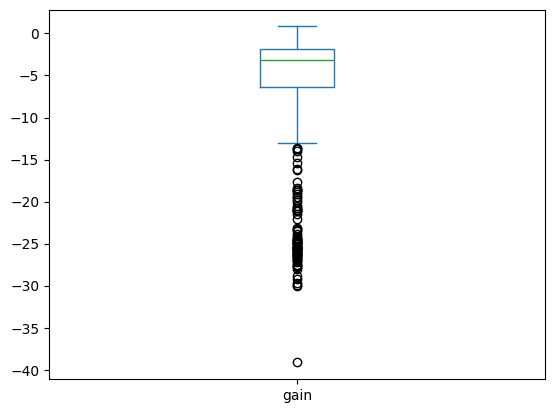

In [73]:
dftb["gain"].plot.box()

In [75]:
size = 500
time = {"clean": [], "ccache": [], "gain": [], "success": [], "reproducible": [True for _ in range(size)]}
for i in range(1, size+1):
    tmp = []
    for j in range(1, 3+1):
        tmp.append(readtime(f"results/busybox/commits/simple-run{j}/{i:03}.time"))
    time["clean"].append(statistics.fmean(tmp))

for i in range(1, size+1):
    tmp = []
    for j in range(1, 3+1):
        tmp.append(readtime(f"results/busybox/commits/ccache-run{j}/{i:03}.time"))
    time["ccache"].append(statistics.fmean(tmp))

for i in range(len(time["clean"])):
    time["gain"].append((time["clean"][i] - time["ccache"][i])/time["clean"][i]*100)
    time["success"].append(os.path.isfile(f"results/busybox/commits/ccache-run1/{i+1:03}.bin"))

In [76]:
dfbb = pandas.DataFrame(time)
dfbb

,clean,ccache,gain,success,reproducible
0,12.190000,18.826667,-54.443533,True,True
1,12.216667,13.433333,-9.959072,True,True
2,12.343333,19.446667,-57.547934,True,True
3,12.223333,13.703333,-12.107990,True,True
4,12.293333,13.396667,-8.975054,True,True
...,...,...,...,...,...
495,12.420000,13.403333,-7.917338,True,True
496,12.426667,13.400000,-7.832618,True,True
497,12.493333,13.396667,-7.230523,True,True
498,12.483333,13.823333,-10.734312,True,True


<Axes: >

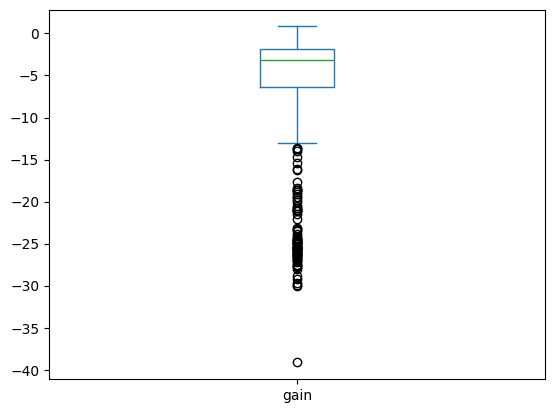

In [77]:
dftb["gain"].plot.box()